<h1><center>Tensorflow 6</center></h1>

In [1]:
import tensorflow.compat.v1 as tf
import numpy as np

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit_psspl/environments/

Here we are adding noise to our x_data

In [2]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [3]:
x_data

array([-1.328551  ,  2.01845555,  2.00219987,  3.38370257,  4.64281188,
        4.86264463,  7.74797996,  6.64236152,  8.234915  ,  8.89061407])

In [4]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [5]:
y_label

array([ 1.36669194,  2.16813509,  3.62032408,  3.44656537,  4.61514113,
        4.76827494,  6.06481208,  6.72392198,  8.61154992, 11.2308266 ])

In [6]:
import matplotlib.pyplot as plt

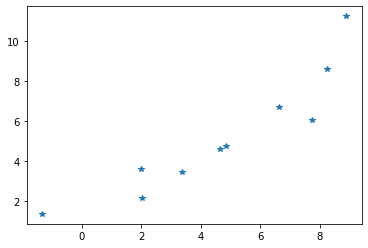

In [7]:
plt.plot(x_data,y_label,"*")

in above and below graph we can see the noise added in above graph

# y = mx + c 

In [8]:
np.random.rand(2)

array([0.64807648, 0.71339197])

In [9]:
m = tf.Variable(0.42)

c = tf.Variable(0.51)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# cost function

error = 0

for x,y in zip(x_data,y_label):
     
        y_pred = m*x + c
        error += (y-y_pred)**2

In [11]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [12]:
init = tf.global_variables_initializer()

In [13]:
with tf.Session() as sess:
    sess.run(init)
    
    epochs = 200
    
    for i in range(epochs):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,c])

In [14]:
final_slope

0.87542146

In [15]:
final_intercept

1.0753102

In [16]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test +final_intercept 

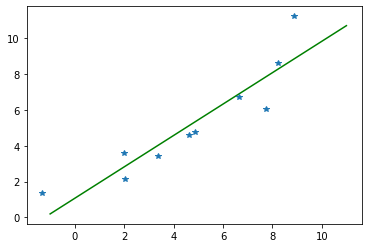

In [17]:
plt.plot(x_test,y_pred_plot,'g')
plt.plot(x_data,y_label,"*")